In [22]:
##Here we have code to replicate figures included in Figure 3 of main paper
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os.path as osp
from glob import glob
import sys
sys.path.append('../')
from constants import *
import os
import numpy as np
from scipy import stats


outdir = 'processed'
os.makedirs(outdir, exist_ok = True)

In [23]:
base_path = '../../results_metrics_aggregated_bme/perturbagen_pred'

In [24]:
##########
#Mechanistic baselines
##########
df = pd.read_csv(osp.join(base_path, 'baselines/chemical_within.csv'))
df['Metric'] = df['Metric'].replace('ranking score', 'rankings')

# Initialize an empty dictionary
performance = {}

# Iterate over the rows of the DataFrame
for _, row in df.iterrows():
    metric = row['Metric']
    baseline = row['Baseline']
    if baseline == 'random': baseline = "Random"
    if baseline == 'cancer_targets': baseline = "Cancer targets"
    if baseline == 'cancer_genes': baseline = "Cancer genes"
    cellline = row['Cellline']
    folds = [row['Fold 1'], row['Fold 2'], row['Fold 3'], row['Fold 4'], row['Fold 5']]
    
    # Initialize nested dictionaries if not already present
    if cellline not in performance:
        performance[cellline] = {}
    if metric not in performance[cellline]:
        performance[cellline][metric] = {}
    if baseline not in performance[cellline][metric]:
        performance[cellline][metric][baseline] = []
    
    # Add the folds data to the dictionary
    performance[cellline][metric][baseline] = folds

# Print the resulting dictionary
# import pprint
# pprint.pprint(performance)

In [25]:
##########
#Biolord
##########

paths = glob(osp.join(base_path, 'Biolord/within/biolord_chemical_r2_*_topk.csv'))

for path in paths:
    df = pd.read_csv(path)
    # Process the new DataFrame to update the dictionary
    method_name = 'Biolord'

    # Iterate over the rows of the new DataFrame
    for _, row in df.iterrows():
        cellline = row['cellline1']
        metric_data = {
            'recall@1': row['recall_at_1'],
            'recall@10': row['recall_at_10'],
            'recall@100': row['recall_at_100'],
            'recall@1000': row['recall_at_1000'],
            'percentage of samples with partially accurate predictions': row['perc_partially_accurate_predictions'],
            'rankings': row['rankings']
        }
        
        # Initialize nested dictionaries if not already present
        if cellline not in performance:
            performance[cellline] = {}
        
        for metric, value in metric_data.items():
            if metric not in performance[cellline]:
                performance[cellline][metric] = {}
            if method_name not in performance[cellline][metric]:
                performance[cellline][metric][method_name] = []
            performance[cellline][metric][method_name].append(value)


In [26]:
##########
#cellOT
##########

paths = glob(osp.join(base_path, 'cellOT/within/cellot_chemical_r2_*_topk.csv'))

for path in paths:
    df = pd.read_csv(path)
    # Process the new DataFrame to update the dictionary
    method_name = 'CellOT'

    # Iterate over the rows of the new DataFrame
    for _, row in df.iterrows():
        cellline = row['cellline1']
        metric_data = {
            'recall@1': row['recall_at_1'],
            'recall@10': row['recall_at_10'],
            'recall@100': row['recall_at_100'],
            'recall@1000': row['recall_at_1000'],
            'percentage of samples with partially accurate predictions': row['perc_partially_accurate_predictions'],
            'rankings': row['rankings']
        }
        
        # Initialize nested dictionaries if not already present
        if cellline not in performance:
            performance[cellline] = {}
        
        for metric, value in metric_data.items():
            if metric not in performance[cellline]:
                performance[cellline][metric] = {}
            if method_name not in performance[cellline][metric]:
                performance[cellline][metric][method_name] = []
            performance[cellline][metric][method_name].append(value)


In [27]:
##########
#ChemCPA
##########

paths = glob(osp.join(base_path, 'ChemCPA/within/chemCPA_chemical_r2_*_topk.csv'))

for path in paths:
    df = pd.read_csv(path)
    # Process the new DataFrame to update the dictionary
    method_name = 'ChemCPA'

    # Iterate over the rows of the new DataFrame
    for _, row in df.iterrows():
        cellline = row['cellline1']
        metric_data = {
            'recall@1': row['recall_at_1'],
            'recall@10': row['recall_at_10'],
            'recall@100': row['recall_at_100'],
            'recall@1000': row['recall_at_1000'],
            'percentage of samples with partially accurate predictions': row['perc_partially_accurate_predictions'],
            'rankings': row['rankings']
        }
        
        # Initialize nested dictionaries if not already present
        if cellline not in performance:
            performance[cellline] = {}
        
        for metric, value in metric_data.items():
            if metric not in performance[cellline]:
                performance[cellline][metric] = {}
            if method_name not in performance[cellline][metric]:
                performance[cellline][metric][method_name] = []
            performance[cellline][metric][method_name].append(value)


In [28]:
##########
#PDGrapher
##########

paths = glob(osp.join(base_path, 'PDgrapher/within/chemical/val/*_drugpred_within_best.csv'))

for path in paths:
    df = pd.read_csv(path)
    df = df[df['Set'] == 'Test']
    
    # Process the new DataFrame to update the dictionary
    method_name = 'PDGrapher'

    # Populate the dictionary
    for index, row in df.iterrows():
        cell_line = row['Cellline']
        metric = row['Metric']
        if metric == 'ranking score':
            metric = 'rankings'
        
        
        if cell_line not in performance:
            performance[cell_line] = {}
            
        if metric not in performance[cell_line]:
            performance[cell_line][metric] = {method_name: []}
        
        values = [row['Fold 1'], row['Fold 2'], row['Fold 3'], row['Fold 4'], row['Fold 5']]
        performance[cell_line][metric]['PDGrapher'] = values


In [29]:
##########
#scGen
##########

paths = glob(osp.join(base_path, 'scGEN/within/scgen_chemical_r2_*_topk.csv'))

for path in paths:
    df = pd.read_csv(path)
    
    # Process the new DataFrame to update the dictionary
    method_name = 'scGen'

    # Iterate over the rows of the new DataFrame
    for _, row in df.iterrows():
        cellline = row['cellline1']
        metric_data = {
            'recall@1': row['recall_at_1'],
            'recall@10': row['recall_at_10'],
            'recall@100': row['recall_at_100'],
            'recall@1000': row['recall_at_1000'],
            'percentage of samples with partially accurate predictions': row['perc_partially_accurate_predictions'],
            'rankings': row['rankings']
        }
        
        # Initialize nested dictionaries if not already present
        if cellline not in performance:
            performance[cellline] = {}
        
        for metric, value in metric_data.items():
            if metric not in performance[cellline]:
                performance[cellline][metric] = {}
            if method_name not in performance[cellline][metric]:
                performance[cellline][metric][method_name] = []
            performance[cellline][metric][method_name].append(value)


In [30]:
# Delete 'HA1E' from the performance dictionary
if 'HA1E' in performance:
    del performance['HA1E']

In [31]:
cell_line_to_cancer_type = {
    'A549': 'Lung-A549',
    'A375': 'Skin-A375',
    'BT20': 'Breast-BT20',
    'HELA': 'Cervix-HELA',
    'HT29': 'Colon-HT29',
    'MCF7': 'Breast-MCF7',
    'MDAMB231': 'Breast-MDAMB231',
    'PC3': 'Prostate-PC3',
    'VCAP': 'Prostate-VCAP'
}

## Panel proportion of partially accurate samples

/tmp/ipykernel_163232/2273729514.py:61: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)


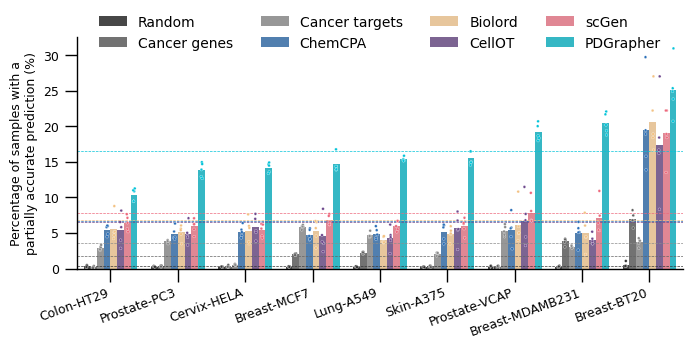

In [32]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Extract the data for 'rankings' into a DataFrame
metric = 'percentage of samples with partially accurate predictions'
data = []
for cellline, metrics in performance.items():
    if metric in metrics:
        for method, values in metrics[metric].items():
            for value in values:
                data.append([cellline, method, value])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Cell Line', 'Method', metric])

# Calculate the mean 'rankings' for each cell line and method
df_mean = df.groupby(['Cell Line', 'Method']).mean().reset_index()

# Order cell lines based on values for PDGrapher
pdgrapher_means = df_mean[df_mean['Method'] == 'PDGrapher'].sort_values(by=metric)
ordered_cell_lines = pdgrapher_means['Cell Line']

# Reorder the DataFrame based on ordered cell lines
df['Cell Line'] = pd.Categorical(df['Cell Line'], categories=ordered_cell_lines, ordered=True)
df_mean['Cell Line'] = pd.Categorical(df_mean['Cell Line'], categories=ordered_cell_lines, ordered=True)



# Apply the mapping to replace cell lines with cancer types
df['Cancer Type'] = df['Cell Line'].map(cell_line_to_cancer_type)
df_mean['Cancer Type'] = df_mean['Cell Line'].map(cell_line_to_cancer_type)

# Replace x-axis labels with cancer types
df['Cell Line'] = df['Cancer Type']
df_mean['Cell Line'] = df_mean['Cancer Type']


# Define a color palette that matches the existing figures
palette = {
    'Biolord': '#f3c283',
    'ChemCPA': '#2C70B9',
    'PDGrapher': '#04C4D9',
    'Cancer genes': '#636363',
    'Cancer targets': '#8C8C8C',
    'CellOT': '#6f4a8e',
    'Random': '#333333',
    'scGen': '#ED697D'
}

# Define the order of methods
method_order = ['Random', 'Cancer genes', 'Cancer targets', 'ChemCPA', 'Biolord', 'CellOT', 'scGen', 'PDGrapher']

with sns.plotting_context(plotting_context):
    # Initialize the plot
    fig, ax = plt.subplots(figsize=(7.35, 3.4))

    # Create a bar plot for each method
    sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)

    # Overlay individual data points
    sns.stripplot(data=df, x='Cell Line', y=metric, hue='Method', palette=palette, dodge=True, jitter=True, alpha=1.0, hue_order=method_order, size=2, edgecolor="white", linewidth=0.2)





    # Add horizontal lines for the overall mean ranking for each method
    for method in method_order:
        overall_mean = df[df['Method'] == method][metric].mean()
        plt.axhline(y=overall_mean, linestyle='--', color=palette[method], linewidth=0.5)

    # Remove title
    plt.title('')
    plt.ylim

    # Remove X-axis label
    plt.xlabel('')
    sns.despine()

    # Adjust legend to only include the bars and place it at the top
    handles, labels = plt.gca().get_legend_handles_labels()
    bar_handles = handles[:len(method_order)]
    bar_labels = labels[:len(method_order)]
    plt.legend(bar_handles, bar_labels, bbox_to_anchor=(0.5, 1.15), loc='upper center', ncol=4, frameon=False, title=None)
    plt.subplots_adjust(right=0.95, bottom = 0.2)
    plt.ylabel('Percentage of samples with a\npartially accurate prediction (%)')
    plt.xticks(rotation=20, ha="right")
    plt.savefig(osp.join(outdir, 'panel_partially_accurate_pred.pdf'))
    plt.show()




In [35]:
df = df_mean
# Step 1: Filter out the data for PDGrapher
pdgrapher_df = df[df['Method'] == 'PDGrapher']

# Step 2: Identify the second-best method for each cell line
second_best_df = df[df['Method'] != 'PDGrapher'].copy()

# Group by cell line and find the second best method (highest value)
second_best_df = second_best_df.sort_values(by=['Cell Line', 'percentage of samples with partially accurate predictions'], ascending=False)
second_best_df = second_best_df.groupby('Cell Line').first().reset_index()

# Step 3: Merge the two DataFrames to compare PDGrapher with the second-best method
comparison_df = pd.merge(pdgrapher_df, second_best_df, on='Cell Line', suffixes=('_PDGrapher', '_SecondBest'))

# Step 4: Calculate the absolute difference
comparison_df['Absolute Difference'] = abs(comparison_df['percentage of samples with partially accurate predictions_PDGrapher'] - comparison_df['percentage of samples with partially accurate predictions_SecondBest'])

# Display the result
comparison_df = comparison_df[['Cell Line', 'Method_SecondBest', 'percentage of samples with partially accurate predictions_PDGrapher', 'percentage of samples with partially accurate predictions_SecondBest', 'Absolute Difference']]
comparison_df

,Cell Line,Method_SecondBest,percentage of samples with partially accurate predictions_PDGrapher,percentage of samples with partially accurate predictions_SecondBest,Absolute Difference
0,Skin-A375,scGen,15.488994,5.959668,9.529326
1,Lung-A549,scGen,15.376623,6.003601,9.373022
2,Breast-BT20,Biolord,25.157346,20.651177,4.506169
3,Cervix-HELA,CellOT,14.206218,5.793280,8.412938
4,Colon-HT29,scGen,10.414781,6.403348,4.011434
5,Breast-MCF7,scGen,14.660817,6.810302,7.850515
6,Breast-MDAMB231,scGen,20.431804,7.102847,13.328957
7,Prostate-PC3,scGen,13.838120,5.917314,7.920806
8,Prostate-VCAP,scGen,19.147093,7.785108,11.361986


## Panel ranking

/tmp/ipykernel_163232/985387894.py:56: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)


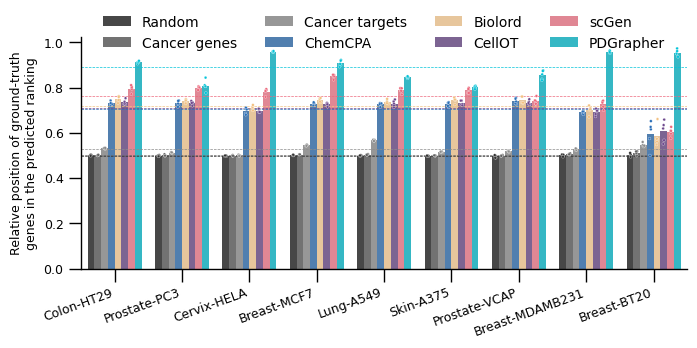

In [12]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Extract the data for 'rankings' into a DataFrame
metric = 'rankings'
data = []
for cellline, metrics in performance.items():
    if metric in metrics:
        for method, values in metrics[metric].items():
            for value in values:
                data.append([cellline, method, value])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Cell Line', 'Method', metric])

# Calculate the mean 'rankings' for each cell line and method
df_mean = df.groupby(['Cell Line', 'Method']).mean().reset_index()

# Order cell lines based on values for PDGrapher
pdgrapher_means = df_mean[df_mean['Method'] == 'PDGrapher'].sort_values(by=metric)
# ordered_cell_lines = pdgrapher_means['Cell Line']

# Reorder the DataFrame based on ordered cell lines
df['Cell Line'] = pd.Categorical(df['Cell Line'], categories=ordered_cell_lines, ordered=True)
df_mean['Cell Line'] = pd.Categorical(df_mean['Cell Line'], categories=ordered_cell_lines, ordered=True)
# Apply the mapping to replace cell lines with cancer types
df['Cancer Type'] = df['Cell Line'].map(cell_line_to_cancer_type)
df_mean['Cancer Type'] = df_mean['Cell Line'].map(cell_line_to_cancer_type)

# Replace x-axis labels with cancer types
df['Cell Line'] = df['Cancer Type']
df_mean['Cell Line'] = df_mean['Cancer Type']

# Define a color palette that matches the existing figures
palette = {
    'Biolord': '#f3c283',
    'ChemCPA': '#2C70B9',
    'PDGrapher': '#04C4D9',
    'Cancer genes': '#636363',
    'Cancer targets': '#8C8C8C',
    'CellOT': '#6f4a8e',
    'Random': '#333333',
    'scGen': '#ED697D'
}

# Define the order of methods
method_order = ['Random', 'Cancer genes', 'Cancer targets', 'ChemCPA', 'Biolord', 'CellOT', 'scGen', 'PDGrapher']

with sns.plotting_context(plotting_context):
    # Initialize the plot
    fig, ax = plt.subplots(figsize=(7.35, 3.4))

    # Create a bar plot for each method
    sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)

    # Overlay individual data points
    sns.stripplot(data=df, x='Cell Line', y=metric, hue='Method', palette=palette, dodge=True, jitter=True, alpha=1.0, hue_order=method_order, size=2, edgecolor="white", linewidth=0.2)





    # Add horizontal lines for the overall mean ranking for each method
    for method in method_order:
        overall_mean = df[df['Method'] == method][metric].mean()
        plt.axhline(y=overall_mean, linestyle='--', color=palette[method], linewidth=0.5)

    # Remove title
    plt.title('')
    plt.ylim

    # Remove X-axis label
    plt.xlabel('')
    sns.despine()

    # Adjust legend to only include the bars and place it at the top
    handles, labels = plt.gca().get_legend_handles_labels()
    bar_handles = handles[:len(method_order)]
    bar_labels = labels[:len(method_order)]
    plt.legend(bar_handles, bar_labels, bbox_to_anchor=(0.5, 1.15), loc='upper center', ncol=4, frameon=False, title=None)
    plt.subplots_adjust(right=0.95, bottom = 0.2)
    plt.xticks(rotation=20, ha="right")
    plt.ylabel('Relative position of ground-truth\ngenes in the predicted ranking')
    plt.savefig(osp.join(outdir, 'panel_ranking.pdf'))
    plt.show()


## Panels recall@k

/tmp/ipykernel_163232/4110151316.py:53: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)


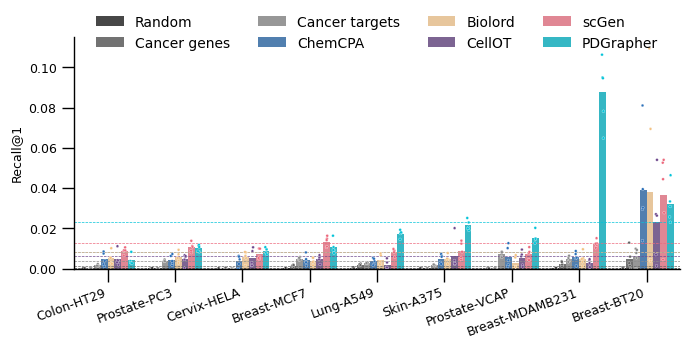

/tmp/ipykernel_163232/4110151316.py:53: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)


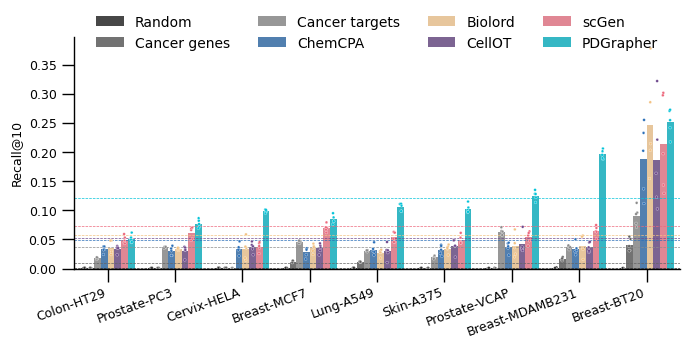

/tmp/ipykernel_163232/4110151316.py:53: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)


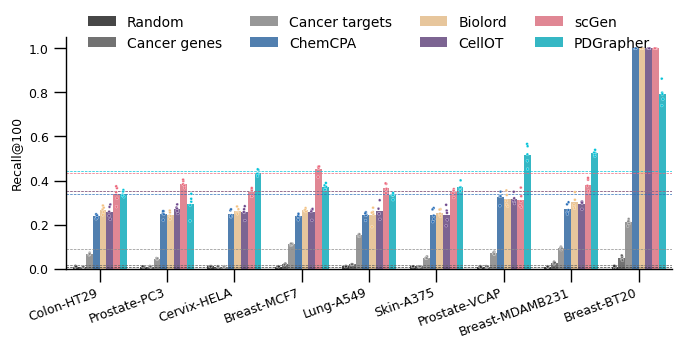

/tmp/ipykernel_163232/4110151316.py:53: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)


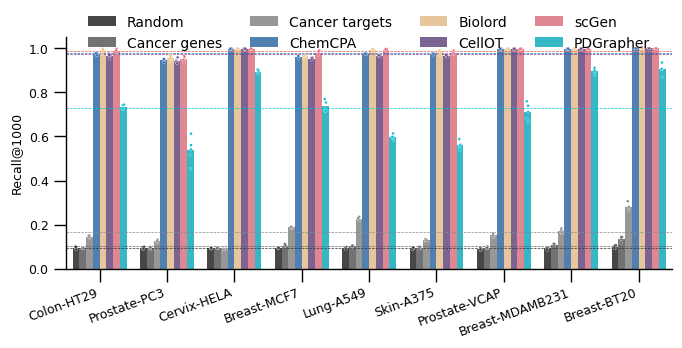

In [13]:

# Extract the data for 'rankings' into a DataFrame

for metric in ['recall@1', 'recall@10', 'recall@100', 'recall@1000']:

    data = []
    for cellline, metrics in performance.items():
        if metric in metrics:
            for method, values in metrics[metric].items():
                for value in values:
                    data.append([cellline, method, value])

    # Create a DataFrame
    df = pd.DataFrame(data, columns=['Cell Line', 'Method', metric])

    # Calculate the mean 'rankings' for each cell line and method
    df_mean = df.groupby(['Cell Line', 'Method']).mean().reset_index()

    # Order cell lines based on values for PDGrapher
    pdgrapher_means = df_mean[df_mean['Method'] == 'PDGrapher'].sort_values(by=metric)
    # ordered_cell_lines = pdgrapher_means['Cell Line']

    # Reorder the DataFrame based on ordered cell lines
    df['Cell Line'] = pd.Categorical(df['Cell Line'], categories=ordered_cell_lines, ordered=True)
    df_mean['Cell Line'] = pd.Categorical(df_mean['Cell Line'], categories=ordered_cell_lines, ordered=True)
    # Apply the mapping to replace cell lines with cancer types
    df['Cancer Type'] = df['Cell Line'].map(cell_line_to_cancer_type)
    df_mean['Cancer Type'] = df_mean['Cell Line'].map(cell_line_to_cancer_type)

    # Replace x-axis labels with cancer types
    df['Cell Line'] = df['Cancer Type']
    df_mean['Cell Line'] = df_mean['Cancer Type']

    # Define a color palette that matches the existing figures
    palette = {
        'Biolord': '#f3c283',
        'ChemCPA': '#2C70B9',
        'PDGrapher': '#04C4D9',
        'Cancer genes': '#636363',
        'Cancer targets': '#8C8C8C',
        'CellOT': '#6f4a8e',
        'Random': '#333333',
        'scGen': '#ED697D'
    }

    # Define the order of methods
    method_order = ['Random', 'Cancer genes', 'Cancer targets', 'ChemCPA', 'Biolord', 'CellOT', 'scGen', 'PDGrapher']

    with sns.plotting_context(plotting_context):
        # Initialize the plot
        fig, ax = plt.subplots(figsize=(7.35, 3.4))

        # Create a bar plot for each method
        sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)

        # Overlay individual data points
        sns.stripplot(data=df, x='Cell Line', y=metric, hue='Method', palette=palette, dodge=True, jitter=True, alpha=1.0, hue_order=method_order, size=2, edgecolor="white", linewidth=0.2)





        # Add horizontal lines for the overall mean ranking for each method
        for method in method_order:
            overall_mean = df[df['Method'] == method][metric].mean()
            plt.axhline(y=overall_mean, linestyle='--', color=palette[method], linewidth=0.5)

        # Remove title
        plt.title('')
        plt.ylim

        # Remove X-axis label
        plt.xlabel('')
        sns.despine()

        # Adjust legend to only include the bars and place it at the top
        handles, labels = plt.gca().get_legend_handles_labels()
        bar_handles = handles[:len(method_order)]
        bar_labels = labels[:len(method_order)]
        plt.legend(bar_handles, bar_labels, bbox_to_anchor=(0.5, 1.15), loc='upper center', ncol=4, frameon=False, title=None)
        plt.subplots_adjust(right=0.95, bottom = 0.2)
        plt.xticks(rotation=20, ha="right")
        plt.ylabel(metric.capitalize())
        plt.savefig(osp.join(outdir, 'panel_{}.pdf'.format(metric)))
        plt.show()

## Aggregated recall@k

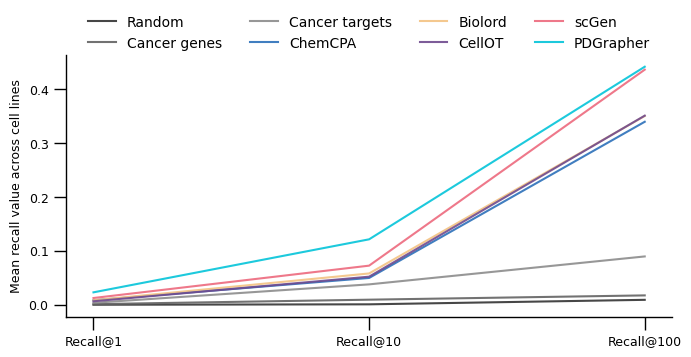

In [14]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize an empty list to store the data
data = []

# Iterate over the performance dictionary to extract all recall metrics
for cellline, metrics in performance.items():
    for metric in ['recall@1', 'recall@10', 'recall@100']:
        if metric in metrics:
            for method, values in metrics[metric].items():
                for value in values:
                    data.append([cellline, metric, method, value])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Cell Line', 'Metric', 'Method', 'Value'])

# Convert the 'Value' column to numeric to avoid any conversion issues
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# Calculate the mean for each method and metric across all cell lines
df_mean = df.groupby(['Metric', 'Method'])['Value'].mean().reset_index()



# Define a color palette that matches the existing figures
palette = {
    'Biolord': '#f3c283',
    'ChemCPA': '#2C70B9',
    'PDGrapher': '#04C4D9',
    'Cancer genes': '#636363',
    'Cancer targets': '#8C8C8C',
    'CellOT': '#6f4a8e',
    'Random': '#333333',
    'scGen': '#ED697D'
}

# Define the order of methods
method_order = ['Random', 'Cancer genes', 'Cancer targets', 'ChemCPA', 'Biolord', 'CellOT', 'scGen', 'PDGrapher']
df_mean['Metric'] = [e.capitalize() for e in df_mean['Metric']]
with sns.plotting_context(plotting_context):
    # Initialize the plot
    fig, ax = plt.subplots(figsize=(7.35, 3.4))

    # Create a line plot for each method showing the mean across all cell lines
    sns.lineplot(data=df_mean, x='Metric', y='Value', hue='Method', palette=palette, hue_order=method_order, markers=True, dashes=False, alpha=0.9)

    # Remove X-axis label
    plt.xlabel('')

    sns.despine()

    # Adjust legend to place it at the top
    handles, labels = plt.gca().get_legend_handles_labels()
    line_handles =  handles[:len(method_order)]
    line_labels = labels[:len(method_order)]
    plt.legend(line_handles, line_labels, bbox_to_anchor=(0.5, 1.2), loc='upper center', ncol=4, frameon=False, title=None)
    # plt.subplots_adjust(top=0.9)
    plt.subplots_adjust(right=0.95)
    # plt.xticks(rotation=20, ha="right")
    plt.ylabel('Mean recall value across cell lines', fontsize=9)
    plt.savefig(osp.join(outdir, 'aggregated_mean_recall_metrics.pdf'))
    plt.show()


## Panels distance between predicted genes and GT genes in the PPI (PDGrapher vs random)

In [15]:

import torch
import networkx as nx
import pickle

outdir = 'distance_predicted_targets_and_gt'


all_lengths_ours_to_real = {}
all_lengths_random_to_real = {}
cell_line_path_dict = {}

for cell_line in ["A549", "A375", "BT20", "HELA", "HT29", "MCF7", "MDAMB231", "PC3", "VCAP"]:
    #Loads edge index 
    base_path = "../../data/processed/torch_data/chemical/real_lognorm"
    path_edge_index = osp.join(base_path, 'edge_index_{}.pt'.format(cell_line))
    edge_index = torch.load(path_edge_index)
    G = nx.Graph() 
    G.add_edges_from(tuple(zip(edge_index[0,:].tolist(), edge_index[1,:].tolist())))
    performance = pd.read_csv('../../results_metrics_aggregated_bme/perturbagen_pred/PDgrapher/within/chemical/val/{}_drugpred_within_best.csv'.format(cell_line))
    ngnn = performance[performance['Set'] == 'Test']['GNN'].iloc[0]
    model_path = glob('../../experiments_resubmission_bme/results/chemical/{}_corrected_pos_emb/n_gnn_{}*'.format(cell_line, ngnn))[0]
    random_path = '../../baselines/mechanistic/results/mechanistic/baseline_random_chemical/random/{}/random'.format(cell_line)
    our_predicted_interventions = pickle.load(open(osp.join(model_path, 'retrieved_interventions.pkl'), "rb"))
    our_real_interventions = pickle.load(open(osp.join(model_path, 'real_interventions.pkl'), "rb"))
    random_predicted_interventions = pickle.load(open(osp.join(random_path, 'retrieved_interventions.pkl'), "rb"))
    random_real_interventions = pickle.load(open(osp.join(random_path, 'real_interventions.pkl'), "rb"))
    for i in our_real_interventions.keys():
        assert len(our_predicted_interventions[i]) == len(our_real_interventions[i]), "predicted and real interventions should have the same length (our model)"
        assert len(random_predicted_interventions[i]) == len(random_real_interventions[i]), "predicted and real interventions should have the same length (random model)"
        assert len(random_predicted_interventions[i]) == len(our_predicted_interventions[i]), "our model and random model should have the same length"
    #Outpath
    outpath = osp.join(outdir, '/'.join(model_path.split('/')[-2:]))
    os.makedirs(outpath, exist_ok=True)
    cell_line_path_dict[cell_line] = outpath
    #Computes the distances if not pre-saved
    if not os.path.exists(osp.join(outpath, 'random_to_real.txt')):
        length = dict(nx.all_pairs_shortest_path_length(G))
        lengths_ours_to_real = []
        lengths_random_to_real = []
        for split_index in our_predicted_interventions.keys():
            pred_ours = our_predicted_interventions[split_index]
            pred_random = random_predicted_interventions[split_index]
            real = our_real_interventions[split_index]
            for i in range(len(pred_ours)):
                pred_ours_i = pred_ours[i]
                pred_random_i = pred_random[i]
                real_i = real[i]
                for j in range(len(real_i)):
                    for jj in range(len(real_i)):
                        lengths_ours_to_real.append(length[real_i[j]][pred_ours_i[jj]])
                        lengths_random_to_real.append(length[real_i[j]][pred_random_i[jj]])
        pd.DataFrame(lengths_random_to_real).to_csv(osp.join(outpath, 'random_to_real.txt'), index=False, header=None)
        pd.DataFrame(lengths_ours_to_real).to_csv(osp.join(outpath, 'ours_to_real.txt'), index=False, header=None)
    else:
        lengths_random_to_real = pd.read_csv(osp.join(outpath, 'random_to_real.txt'),header=None)[0].tolist()
        lengths_ours_to_real = pd.read_csv(osp.join(outpath, 'ours_to_real.txt'),  header=None)[0].tolist()
    all_lengths_ours_to_real[cell_line] = lengths_ours_to_real
    all_lengths_random_to_real[cell_line] = lengths_random_to_real



/home/gonzag46/scratch/conda/envs/pdgrapher/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


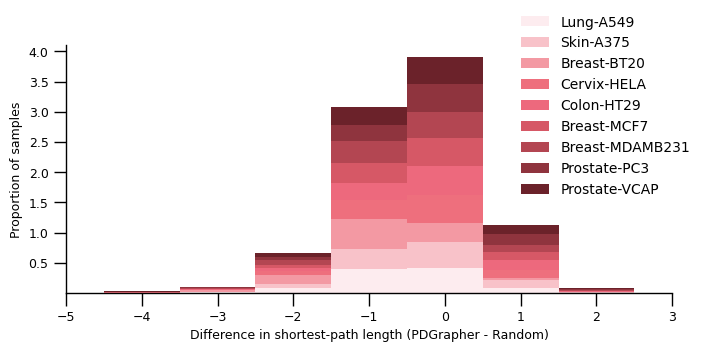

In [16]:
####Stacked histogram of the distances of PDGrapher - Random for all cell lines togheter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


cell_lines = list(all_lengths_ours_to_real.keys())

# Predefined colors for each cell line
cell_line_colors = {
    'A549': '#fdecef',    # Very light pink
    'A375': '#f8c2c9',    # Light pink
    'BT20': '#f399a3',    # Soft pink
    'HELA': '#ee6f7d',    # Medium light pink
    'HT29': '#ed697d',    # Medium pink
    'MCF7': '#d65866',    # Darker pink
    'MDAMB231': '#b34652',# Rich pink
    'PC3': '#8f343e',     # Deeper pink
    'VCAP': '#6b222a'     # Darkest pink
}
# Set up the bins based on the possible range of differences
all_differences = []

for cell_line in cell_lines:
    lengths_ours_to_real = all_lengths_ours_to_real[cell_line]
    lengths_random_to_real = all_lengths_random_to_real[cell_line]
    
    # Compute the element-wise difference (random - ours)
    difference_lengths =  np.array(lengths_ours_to_real) - np.array(lengths_random_to_real)
    all_differences.extend(difference_lengths)

bins = np.arange(min(all_differences), max(all_differences) + 1) - 0.5

with sns.plotting_context(plotting_context):
    # Set up the plot
    fig, ax = plt.subplots(figsize=(7.35, 3.4))

    # Plot stacked histogram
    bottoms = np.zeros(len(bins) - 1)

    for cell_line in cell_lines:
        lengths_ours_to_real = all_lengths_ours_to_real[cell_line]
        lengths_random_to_real = all_lengths_random_to_real[cell_line]
        
        # Compute the element-wise difference (random - ours)
        difference_lengths = np.array(lengths_ours_to_real) - np.array(lengths_random_to_real)
        
        # Calculate the histogram counts
        counts, _ = np.histogram(difference_lengths, bins=bins)
        
        # Normalize to get proportions
        proportions = counts / np.sum(counts)
        
        # Plot the proportion-based histogram for this cell line
        ax.bar(bins[:-1] + 0.5, proportions, bottom=bottoms, width=1.0, color=cell_line_colors[cell_line], label=cell_line_to_cancer_type[cell_line])
        
        # Update the bottom position for the next stack
        bottoms += proportions

    # Adding labels and title
    ax.set_xlabel('Difference in shortest-path length (PDGrapher - Random)', fontsize=9)
    ax.set_ylabel('Proportion of samples', fontsize=9)
    ax.set_title('')
    ax.set_xlim(-5, 3)

    # Customize the legend
    ax.legend(loc='upper right', bbox_to_anchor=(1.05, 1.17), frameon=False, title=None)
    sns.despine()
    plt.subplots_adjust(bottom=0.15, right=0.95)
    plt.savefig(osp.join(outdir, 'stacked_histogram_proportion_difference_random_pdgrapher.pdf'), transparent=True)
    plt.show()


In [17]:

#Put all data together
lengths_ours_to_real = np.concatenate([all_lengths_ours_to_real[e] for e in all_lengths_ours_to_real]).tolist()
lengths_random_to_real = np.concatenate([all_lengths_random_to_real[e] for e in all_lengths_random_to_real]).tolist()
data = pd.DataFrame([lengths_ours_to_real + lengths_random_to_real, ['PDGrapher' for i in range(len(lengths_ours_to_real))] + ['Random' for i in range(len(lengths_random_to_real))]]).transpose()
data.columns = ['distance', 'Model']

colors = ['#04C4D9', '#333333']

with sns.plotting_context(plotting_context_small):
    sns.set_palette(sns.color_palette(colors))

    weights_ours = np.ones_like(lengths_ours_to_real) / len(lengths_ours_to_real)
    weights_random = np.ones_like(lengths_random_to_real) / len(lengths_random_to_real)
    weights = np.concatenate([weights_ours, weights_random])
    data['weights'] = weights
    ax = sns.displot(data, x="distance", hue='Model', multiple='dodge', discrete=True, alpha = 0.8, weights='weights', height=1.7, aspect=0.7)

    ax.set(xlabel='Shortest-path length', ylabel='Proportion of samples')
    sns.move_legend(
                        ax, "lower left",
                        bbox_to_anchor=(.58, 0.7), ncol=1, title=None, frameon=False,
                    )
    plt.subplots_adjust(top=0.9, right=0.95, left=0.2)
    plt.savefig(osp.join(outpath, '../../panel_distribution_network_distance_model_vs_random_alltogether.pdf'.format(cell_line)), transparent=True)
    plt.close()

In [18]:

#Individual plots

for cell_line in all_lengths_ours_to_real.keys():
    lengths_ours_to_real = all_lengths_ours_to_real[cell_line]
    lengths_random_to_real = all_lengths_random_to_real[cell_line]
    
    data = pd.DataFrame([lengths_ours_to_real + lengths_random_to_real, ['PDGrapher' for i in range(len(lengths_ours_to_real))] + ['Random' for i in range(len(lengths_random_to_real))]]).transpose()
    data.columns = ['distance', 'Model']

    colors = ['#04C4D9', '#333333']

    with sns.plotting_context(plotting_context_small):
        sns.set_palette(sns.color_palette(colors))

        weights_ours = np.ones_like(lengths_ours_to_real) / len(lengths_ours_to_real)
        weights_random = np.ones_like(lengths_random_to_real) / len(lengths_random_to_real)
        weights = np.concatenate([weights_ours, weights_random])
        data['weights'] = weights
        ax = sns.displot(data, x="distance", hue='Model', multiple='dodge', discrete=True, alpha = 0.8, weights='weights', height=1.7, aspect=0.7)

        ax.set(xlabel='Shortest-path length', ylabel='Proportion of samples')
        sns.move_legend(
                            ax, "lower left",
                            bbox_to_anchor=(.58, 0.7), ncol=1, title=None, frameon=False,
                        )
        plt.subplots_adjust(top=0.9, right=0.95, left=0.2)
        plt.savefig(osp.join(cell_line_path_dict[cell_line], 'panel_distribution_network_distance_model_vs_random_{}.pdf'.format(cell_line)), transparent=True)
        plt.close()
            

In [19]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# # Assuming you have the data in dictionaries `all_lengths_ours_to_real` and `all_lengths_random_to_real`
# cell_lines = list(all_lengths_ours_to_real.keys())

# # Predefined colors for each cell line
# cell_line_colors = {
#     'A549': '#1f77b4',    # Blue
#     'A375': '#ff7f0e',    # Orange
#     'BT20': '#2ca02c',    # Green
#     'HELA': '#d62728',    # Red
#     'HT29': '#9467bd',    # Purple
#     'MCF7': '#8c564b',    # Brown
#     'MDAMB231': '#e377c2',# Pink
#     'PC3': '#7f7f7f',     # Gray
#     'VCAP': '#bcbd22'     # Olive
# }

# # Set up the plot
# fig, ax = plt.subplots(figsize=(10, 8))

# # Plot the difference proportions for each cell line
# for cell_line in cell_lines:
#     lengths_ours_to_real = all_lengths_ours_to_real[cell_line]
#     lengths_random_to_real = all_lengths_random_to_real[cell_line]
    
#     # Compute the element-wise difference (ours - random)
#     difference_lengths = np.array(lengths_random_to_real) - np.array(lengths_ours_to_real) 
    
#     # Calculate unique values from the difference
#     unique_values = np.unique(difference_lengths)
    
#     # Count occurrences of each unique value
#     difference_counts = np.array([np.sum(difference_lengths == value) for value in unique_values])
    
#     # Calculate proportions from the counts
#     difference_proportions = difference_counts / np.sum(difference_counts) if np.sum(difference_counts) > 0 else np.zeros_like(difference_counts)
    
#     # Plot the proportions based on the difference
#     ax.plot(unique_values, difference_proportions, marker='o', linestyle='-', color=cell_line_colors[cell_line], label=f'{cell_line}')

# # Customize the legend
# ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# # Adding labels and title
# ax.set_xlabel('Difference in Shortest-path length (PDGrapher - Random)')
# ax.set_ylabel('Proportion of Samples')
# ax.set_title('Proportions from Differences Between PDGrapher and Random Methods Across Cell Lines')

# # Add a horizontal line at y=0 for reference
# ax.axhline(0, color='black', linewidth=0.5, linestyle='--')

# plt.savefig('proportion_difference_lengths_pdgrapher_random.pdf', transparent=True)
# plt.show()


In [20]:
counts

array([     0,      3,     62,   1047,   3196,  13934,  71142, 107147,
        34061,   2360,     60])